In [1]:
import sys
sys.path.append("/users/munozr/mycodes")
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import LinData
import pandas as pd
import h5py
from data_analysis_codes.tools import NumMethods
from data_analysis_codes.tools import FD as FD_File
from data_analysis_codes.tools import Ricci_CoGrad_Weyl as RCW_file
from data_analysis_codes.tools import TAradius

In [2]:
param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N32_EdS_GRH_spin_CosmoPuncture')
Lin = LinData.LinData_Class(param)
fevo = pd.read_table(param['datapath']+'h5_data.csv', delimiter=',')
FD = FD_File.FD_Class(param['dx'], param['dy'], param['dz'])
RCW = RCW_file.Ricci_CoGrad_Weyl_Class(FD)
TAr = TAradius.TA_Class(param, Lin, [[8], [8], [8]])

 could not read time file


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/lustre2/ET_sims/pflrw_d3e2_L1206_t1_N32_EdS_GRH_spin_CosmoPuncture/output-0000/pflrw_d3e2_L1206_t1_N32_EdS_GRH_spin_CosmoPuncture/h5_data.csv'

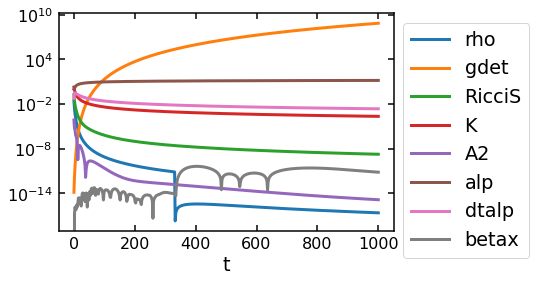

In [3]:
for var in ['rho','gdet','RicciS','K','A2','alp','dtalp','betax']:
    plt.semilogy(fevo['t'], abs(fevo[var+'_OD']), label=var)
plt.xlabel('t')
plt.legend(bbox_to_anchor=(1,1))

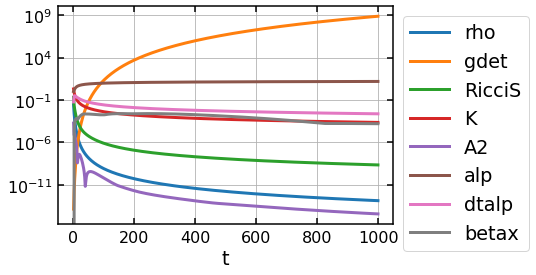

In [4]:
for var in ['rho','gdet','RicciS','K','A2','alp','dtalp','betax']:
    plt.semilogy(fevo['t'], abs(fevo[var+'_max']), label=var)
plt.xlabel('t')
plt.legend(bbox_to_anchor=(1,1))
plt.grid()

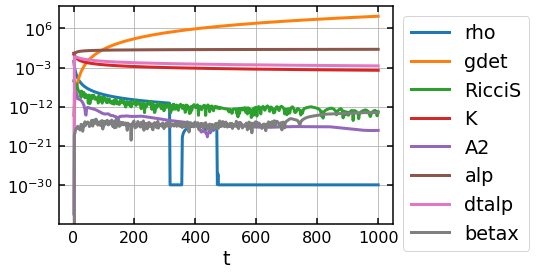

In [5]:
for var in ['rho','gdet','RicciS','K','A2','alp','dtalp','betax']:
    plt.semilogy(fevo['t'], abs(fevo[var+'_min']), label=var)
plt.xlabel('t')
plt.legend(bbox_to_anchor=(1,1))
plt.grid()

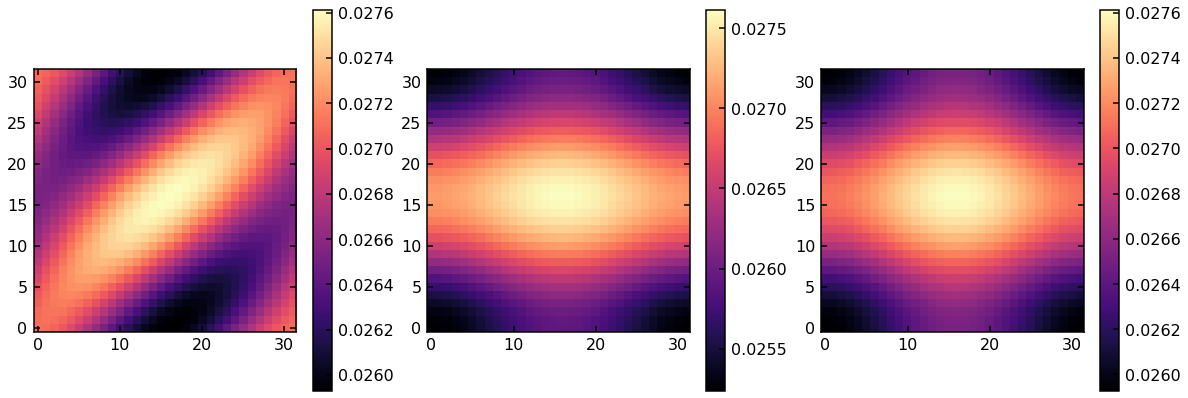

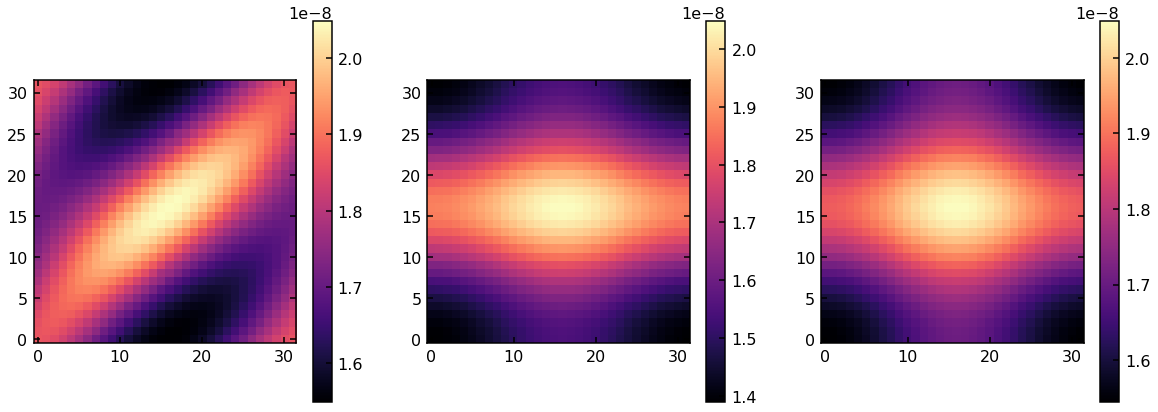

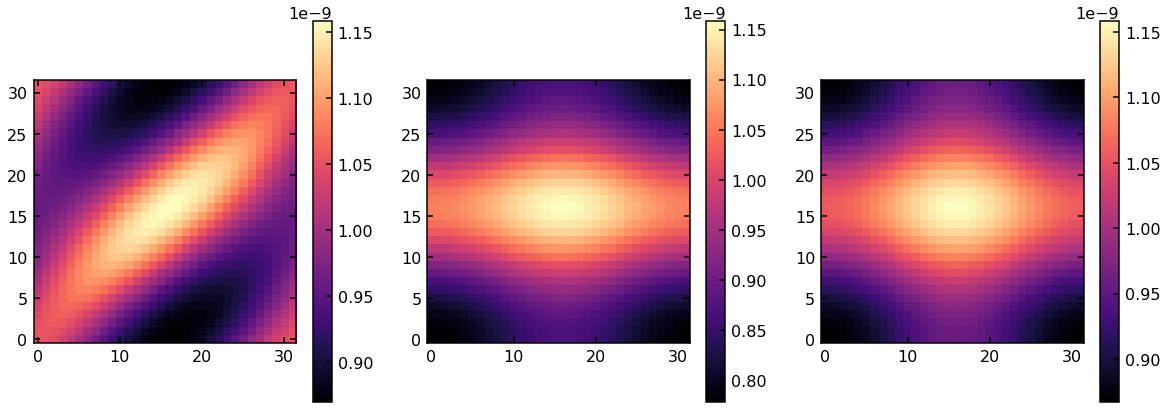

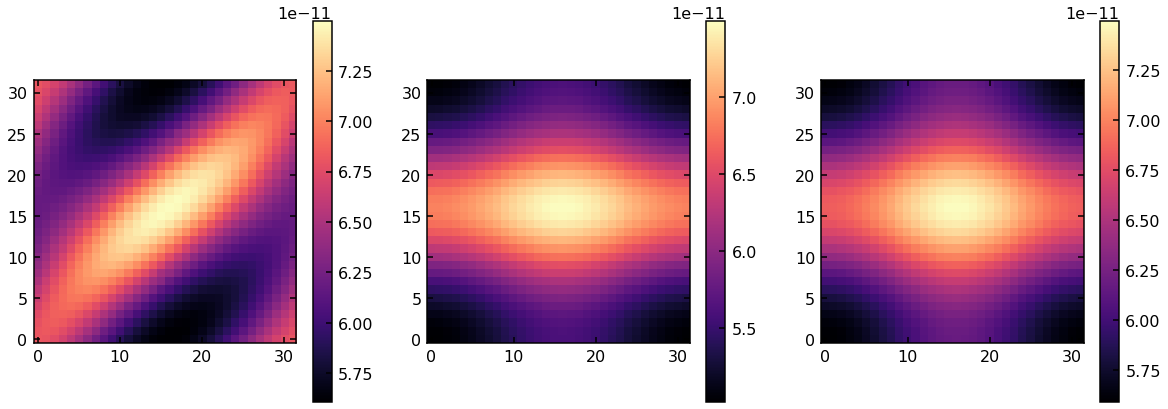

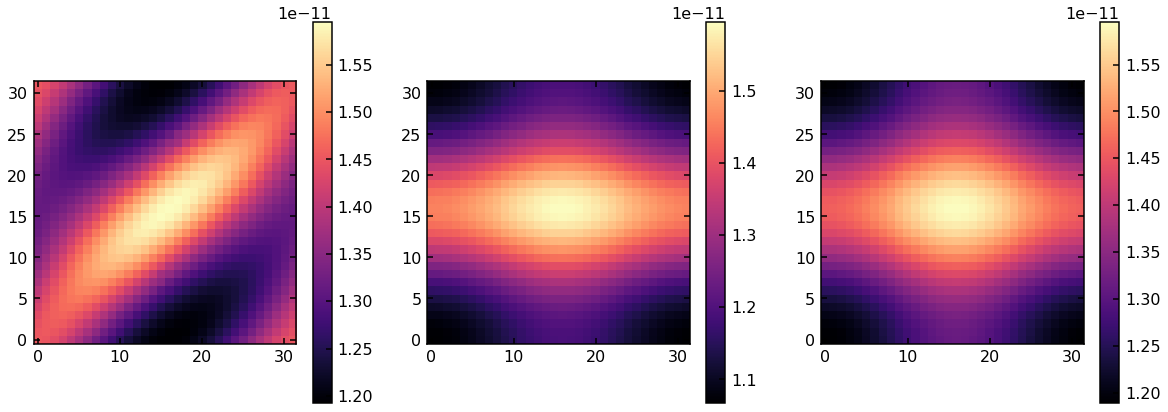

In [19]:
param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N32_EdS_GRH_spin_CosmoPuncture')
for it in [0, 2500, 5000, 10000, 15000]:
    f = h5py.File('{}_it_{:06d}.hdf5'.format(param['h5datapath'] + param['simname'], it), 'r') 
    rho = RRead.fixij(f['HYDROBASE::{} it={} tl=0'.format('rho', it) + ' rl={}'.format(param['max_refinement_levels'] - 1)])
    rho = RRead.cut0(rho, param['ghost_size'], param['Nx'])
    
    betax = RRead.fixij(f['ADMBASE::{} it={} tl=0'.format('betax', it) + ' rl={}'.format(param['max_refinement_levels'] - 1)])
    betax = RRead.cut0(betax, param['ghost_size'], param['Nx'])
    
    #alp = RRead.fixij(f['ADMBASE::{} it={} tl=0'.format('alp', it) + ' rl={}'.format(param['max_refinement_levels'] - 1)])
    #alp = RRead.cut0(betax, param['ghost_size'], param['Nx'])
    
    vx = RRead.fixij(f['HYDROBASE::{} it={} tl=0'.format('vel[0]', it) + ' rl={}'.format(param['max_refinement_levels'] - 1)])
    vx = RRead.cut0(vx, param['ghost_size'], param['Nx'])
    
    #W = RRead.fixij(f['HYDROBASE::{} it={} tl=0'.format('w_lorentz', it) + ' rl={}'.format(param['max_refinement_levels'] - 1)])
    #W = RRead.cut0(W, param['ghost_size'], param['Nx'])
    
    #ux = W*vx - W*(betax/alp)
    
    data = rho
    icent = int(param['Nx']/2)
    plt.figure(figsize=(20,7))
    plt.subplot(131)
    plt.imshow(data[:,:,icent])
    plt.colorbar()
    #plt.title('t={:.2f}'.format(fevo['t'][int(it/param['IOHDF5::out_every'])]))
    plt.subplot(132)
    plt.imshow(data[:,icent,:])
    plt.colorbar()
    plt.subplot(133)
    plt.imshow(data[icent,:,:])
    plt.colorbar()

 read time file


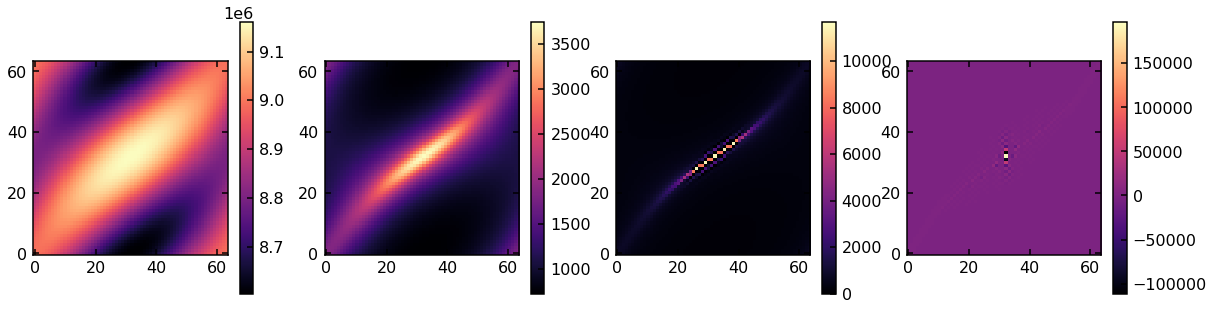

In [69]:
# 64^3
param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N64_EdS_spin_CosmoPuncture')
Lin = LinData.LinData_Class(param)
rho_today = Lin.evo.rho(Lin.evo.t_func_z(0))

plt.figure(figsize=(20,5))
i = 1
parsec = 3.0857e16 # m
Mpc = parsec*1e6 # m
G = 6.67428e-11 # m^3 kg^-1 s^-2
c = 299792458 # m s^-1
Msun = 1.98892e30 #kg

for it in [0, 10000, 20000, 30000]:
#for it in [0, 5000, 10000, 15000]:
    f = h5py.File('{}_it_{:06d}.hdf5'.format(param['h5datapath'] + param['simname'], it), 'r') 
    try:
        rho = RRead.fixij(f['HYDROBASE::{} it={} tl=0'.format('rho', it) + ' rl={}'.format(param['max_refinement_levels'] - 1)])
        rho = RRead.cut0(rho, param['ghost_size'], param['Nx'])
        Massfac = Msun
        Lm = Msun * G / (c**2)
        V = (Lm)**3
        rho = rho / rho_today
    except:
        rho = RRead.fixij(f['CT_DUST::{} it={} tl=0'.format('rho', it) + ' rl={}'.format(param['max_refinement_levels'] - 1)])
        rho = RRead.cut0(rho, param['ghost_size'], param['Nx'])
        rho = rho / rho_today
        
    tau = RRead.fixij(f['COSMOLAPSE::{} it={} tl=0'.format('tau', it) + ' rl={}'.format(param['max_refinement_levels'] - 1)])
    tau = RRead.cut0(tau, param['ghost_size'], param['Nx'])
    
    data = rho #Lin.evo.z(tau) #/Lin.evo.a(1)
    icent = int(param['Nx']/2)
    plt.subplot(140+i)
    plt.imshow(data[:,:,icent])
    plt.colorbar()
    i+=1

 read time file


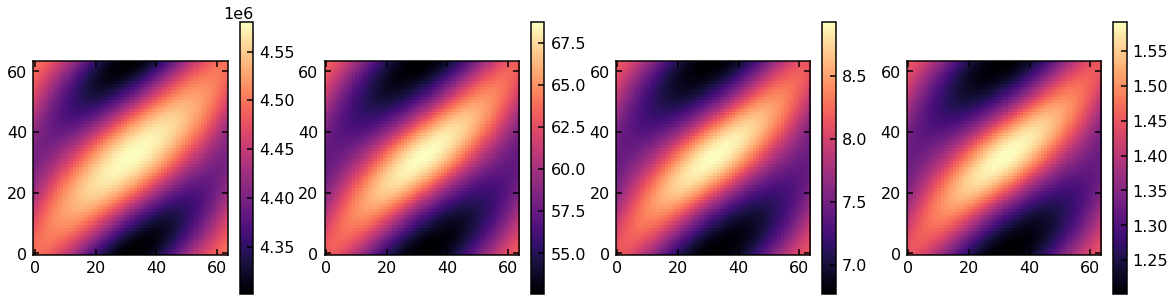

In [68]:
# 64^3
param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N64_EdS_GRH_spin_CosmoPuncture')
Lin = LinData.LinData_Class(param)
rho_today = Lin.evo.rho(Lin.evo.t_func_z(0))

plt.figure(figsize=(20,5))
i = 1
parsec = 3.0857e16 # m
Mpc = parsec*1e6 # m
G = 6.67428e-11 # m^3 kg^-1 s^-2
c = 299792458 # m s^-1
Msun = 1.98892e30 #kg

for it in [0, 2500, 4000, 6000]:
#for it in [0, 5000, 10000, 15000]:
    f = h5py.File('{}_it_{:06d}.hdf5'.format(param['h5datapath'] + param['simname'], it), 'r') 
    try:
        rho = RRead.fixij(f['HYDROBASE::{} it={} tl=0'.format('rho', it) + ' rl={}'.format(param['max_refinement_levels'] - 1)])
        rho = RRead.cut0(rho, param['ghost_size'], param['Nx'])
        Massfac = Msun
        Lm = Msun * G / (c**2)
        V = (Lm)**3
        rho = rho / rho_today
    except:
        rho = RRead.fixij(f['CT_DUST::{} it={} tl=0'.format('rho', it) + ' rl={}'.format(param['max_refinement_levels'] - 1)])
        rho = RRead.cut0(rho, param['ghost_size'], param['Nx'])
        rho = rho / rho_today
        
    tau = RRead.fixij(f['COSMOLAPSE::{} it={} tl=0'.format('tau', it) + ' rl={}'.format(param['max_refinement_levels'] - 1)])
    tau = RRead.cut0(tau, param['ghost_size'], param['Nx'])
    
    data = rho #Lin.evo.z(tau) #/Lin.evo.a(1)
    icent = int(param['Nx']/2)
    plt.subplot(140+i)
    plt.imshow(data[:,:,icent])
    plt.colorbar()
    i+=1

In [49]:
Lin.evo.rho(Lin.evo.t_func_z(0))

6.028096630930316e-09

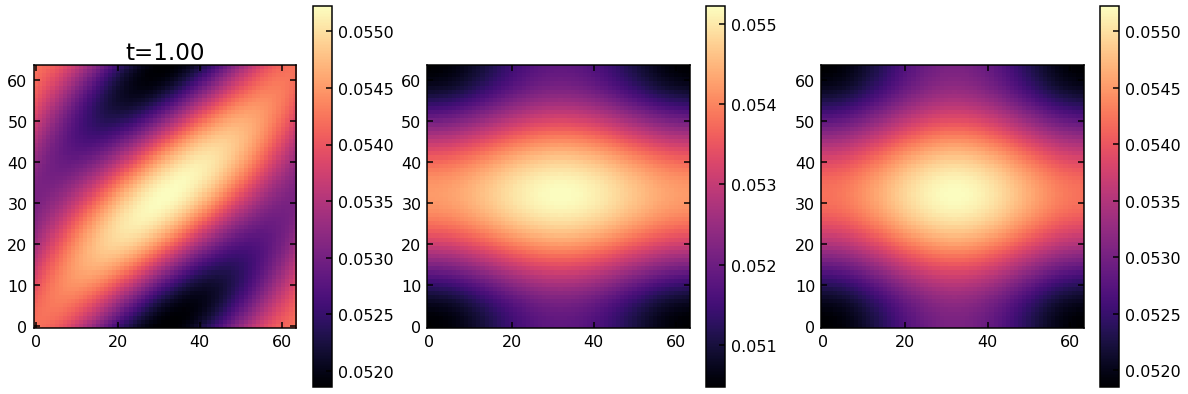

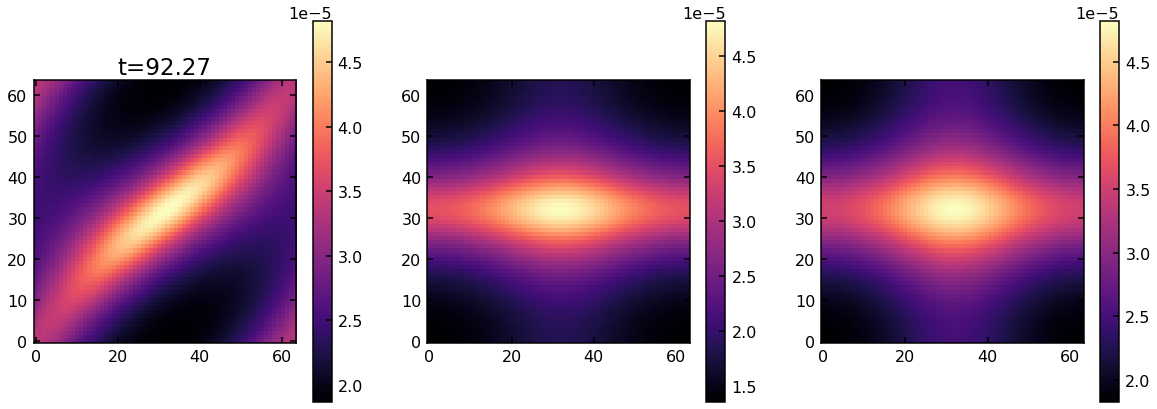

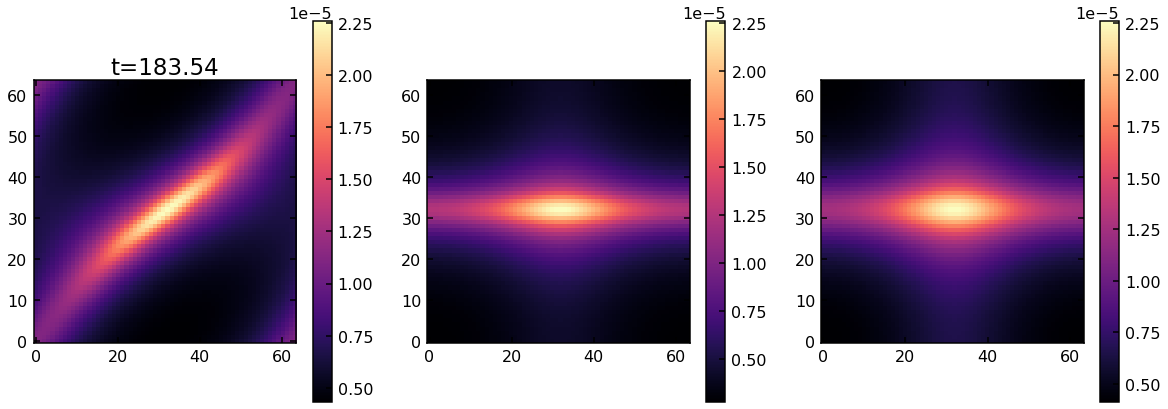

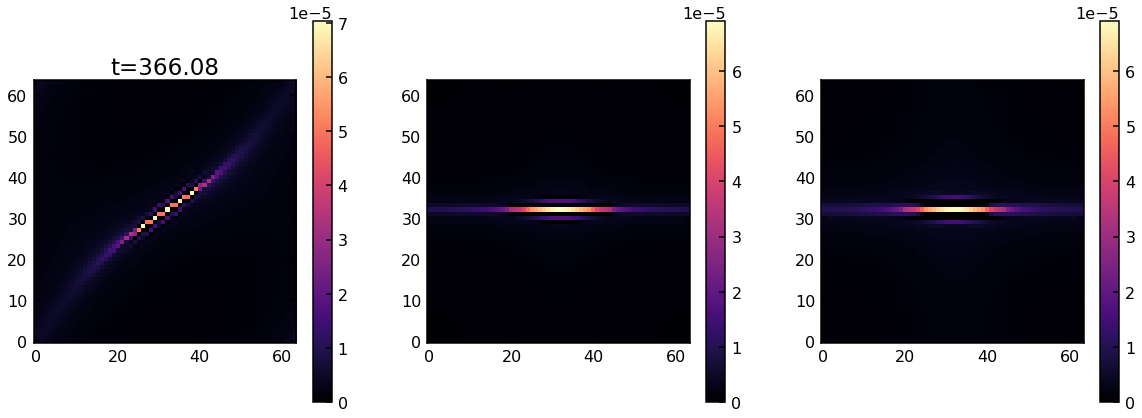

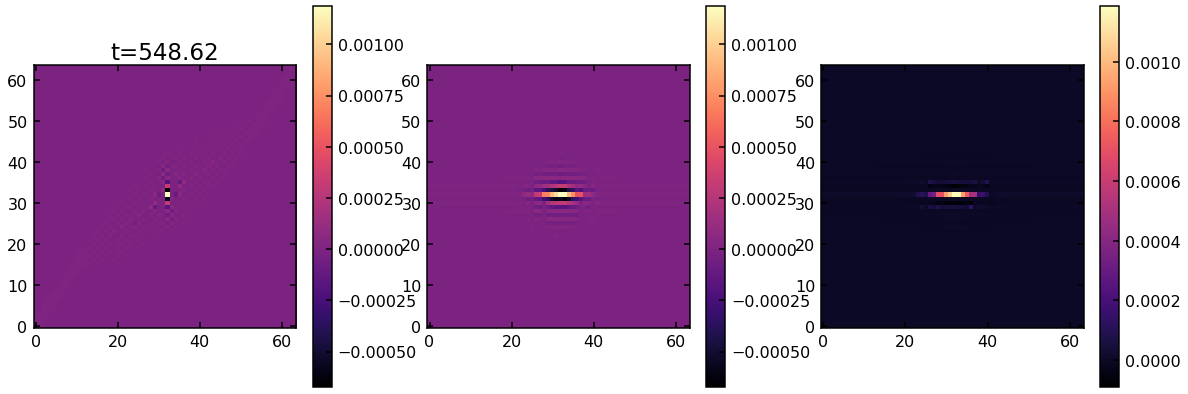

In [17]:
param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N64_EdS_spin_CosmoPuncture')
for it in [0, 5000, 10000, 20000, 30000]:
    f = h5py.File('{}_it_{:06d}.hdf5'.format(param['h5datapath'] + param['simname'], it), 'r') 
    rho = RRead.fixij(f['CT_DUST::{} it={} tl=0'.format('rho', it) + ' rl={}'.format(param['max_refinement_levels'] - 1)])
    rho = RRead.cut0(rho, param['ghost_size'], param['Nx'])
    ux = RRead.fixij(f['CT_DUST::{} it={} tl=0'.format('u1', it) + ' rl={}'.format(param['max_refinement_levels'] - 1)])
    ux = RRead.cut0(ux, param['ghost_size'], param['Nx'])
    betax = RRead.fixij(f['ADMBASE::{} it={} tl=0'.format('betax', it) + ' rl={}'.format(param['max_refinement_levels'] - 1)])
    betax = RRead.cut0(betax, param['ghost_size'], param['Nx'])
    data = rho
    icent = int(param['Nx']/2)
    plt.figure(figsize=(20,7))
    plt.subplot(131)
    plt.imshow(data[:,:,icent])
    plt.colorbar()
    plt.title('t={:.2f}'.format(fevo['t'][int(it/param['IOHDF5::out_every'])]))
    plt.subplot(132)
    plt.imshow(data[:,icent,:])
    plt.colorbar()
    plt.subplot(133)
    plt.imshow(data[icent,:,:])
    plt.colorbar()

In [11]:
37.6875/4

9.421875

In [33]:
c = 1
h = 0.6737
H0 = h*c/2997.9
t0 = 2 / ( 3 * H0 )
t0

2966.602345257533

In [34]:
H0

0.0002247239734480803